<strong>Name:</strong> Anyanzo Ivan Brian <br>
<strong>Student No:</strong> 2000717674 <br>
<strong>Registration No:</strong> 2020/HD05/17674U <br>
<strong>Course:</strong> Master of Science in Computer Science

In [1]:
# Importing necessary library
import pandas as pd
import numpy as np
import os, os.path
import re, random
from wordcloud import WordCloud # for generating word clouds

<strong>Step 1: Load the dataset</strong>

In [2]:
df = pd.read_excel('internship_comments.xlsx')
df

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...
...,...,...
3909,7963,Intern managed to set up a monitoring tool on ...
3910,7967,This was impressive work. The intern opened gr...
3911,7968,The week went well. Students had a background ...
3912,7969,It was best to attach the intern to an actual ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  3914 non-null   int64 
 1   Comment     3913 non-null   object
dtypes: int64(1), object(1)
memory usage: 61.3+ KB


In [4]:
# drop null records
df.dropna(inplace=True)
df

,comment_id,Comment
0,5,djfjkdfjkjkffdk edited
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...
...,...,...
3909,7963,Intern managed to set up a monitoring tool on ...
3910,7967,This was impressive work. The intern opened gr...
3911,7968,The week went well. Students had a background ...
3912,7969,It was best to attach the intern to an actual ...


In [5]:
# drop the first  row with dummy text
df = df.drop([0])
df

,comment_id,Comment
1,41,Faith has exhibited enthusiasm in taking on th...
2,49,He now has now understood the structure of gra...
3,50,The Intern was oriented on ICT setup and Infra...
4,52,The student was oriented on the organization s...
5,53,Activities well completed
...,...,...
3909,7963,Intern managed to set up a monitoring tool on ...
3910,7967,This was impressive work. The intern opened gr...
3911,7968,The week went well. Students had a background ...
3912,7969,It was best to attach the intern to an actual ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 1 to 3913
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   comment_id  3912 non-null   int64 
 1   Comment     3912 non-null   object
dtypes: int64(1), object(1)
memory usage: 91.7+ KB


<strong>Step 2: Create a custome corpus</strong>

In [7]:
# create a corpus directory
path = os.path.expanduser('~/nltk_data')

# checking
if not os.path.exists(path):
    os.mkdir(path)
    print ("Does path exists : ", os.path.exists(path))

import nltk.data
print ("\nDoes path exists in nltk : ", path in nltk.data.path)



Does path exists in nltk :  True


In [8]:
# Loop through the pandas dataframe and pass the each sentence
# to a corpus file in the corpus directory
internship_comments = 'internship_comments' + '.txt'
corpus_path = open(path + '/' + internship_comments, 'w')

for index, row in df.iterrows():
        comment_id = row['comment_id']
        comment = row['Comment']
        corpus_path.write(str(comment))   
        
corpus_path.close()

In [9]:
# load the corpus and convert the bytes to string
import nltk.data
internship_corpus = nltk.data.load("internship_comments.txt", format='raw')
internship_corpus = ''.join(map(chr, internship_corpus))
internship_corpus

'Faith has exhibited enthusiasm in taking on the project at hand. She has already shown promising signs in understanding the core concepts of software engineering. I look forward discovering more as time goes on.He now has now understood the structure of grails and how different components relate. Understands the process of getting API\'s from MTNThe Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship. Simon was encouraged to take the Internship seriously as there was a lot to learn.The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.  He acquired both technical and teamwork skills at workplace.Activities well completedfinished on timeThe student\'s weekly progress was justifiably good, characterized with enthusiasm to learning more.NotedShe found this very interesting as she was able to identify, know problems a

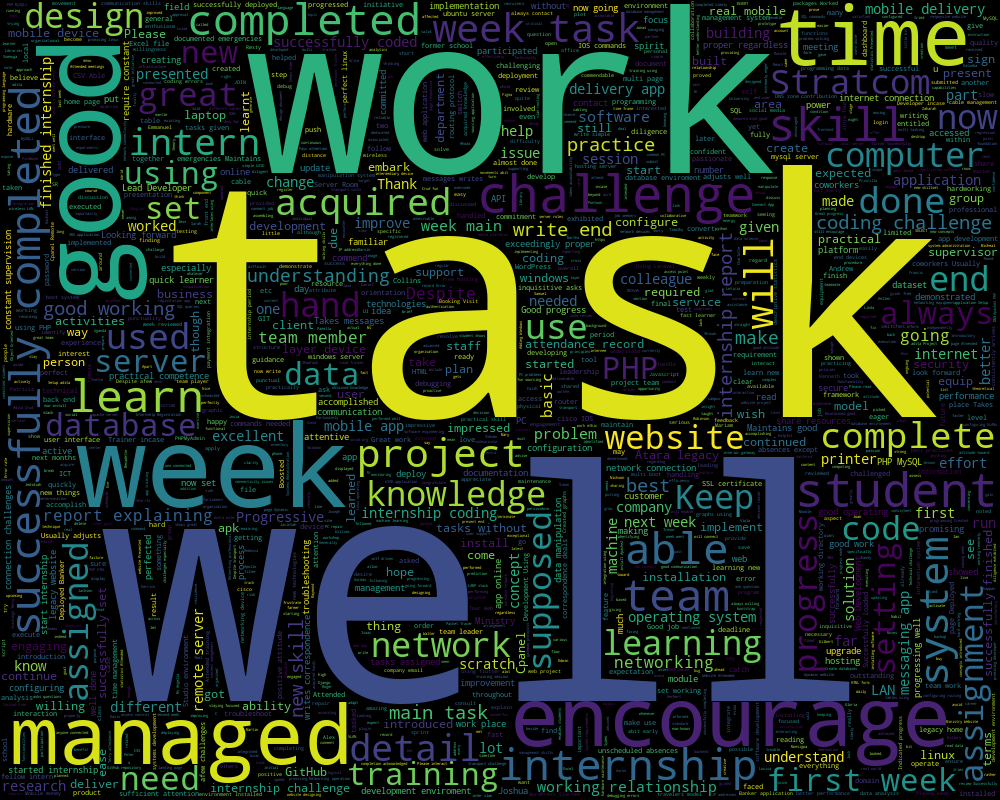

In [10]:
# Create a WordCloud object of the current corpus
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue',width=1000,height=800)

# Generate a word cloud
wordcloud.generate(internship_corpus)

# Visualize the word cloud
wordcloud.to_image()

<strong>Step 3: Tokenization</strong>

In [11]:
# sentence tokenization
default_st = nltk.sent_tokenize
internship_sentences = default_st(text=internship_corpus)
len(internship_sentences)

2821

In [12]:
# first 10 sentences
internship_sentences[:10]

['Faith has exhibited enthusiasm in taking on the project at hand.',
 'She has already shown promising signs in understanding the core concepts of software engineering.',
 'I look forward discovering more as time goes on.He now has now understood the structure of grails and how different components relate.',
 "Understands the process of getting API's from MTNThe Intern was oriented on ICT setup and Infrastructure of Soroti University, drafted workplan and started off the Internship.",
 'Simon was encouraged to take the Internship seriously as there was a lot to learn.The student was oriented on the organization structure, developed workplan for the 4 week internship and participated in assessment of printers for servicing.',
 "He acquired both technical and teamwork skills at workplace.Activities well completedfinished on timeThe student's weekly progress was justifiably good, characterized with enthusiasm to learning more.NotedShe found this very interesting as she was able to identif

In [13]:
# last 10 sentences
internship_sentences[-10:]

['Trunking ports and setting the Access ports as per the identified Vlans   \r\n               Configuring DHCP server on a routerEngaging teammateEngaging teammateEngaging teammateSuccessfully installed Microsoft word to the computers and modification of the system\r\nImproved time management despite required attention from university activities.Hope you have learned something from your experience with the bank.',
 'Best of luck in rest of your studies.Improved inter personal skill while working with staff and fellow interns.',
 'Confident while carrying out tasks.She is learning how to adapt to practical way of learning software development skills through hands on practical and applied skills  of the software development life cycle.Completed working with APIs by fetching data from MYSQL databasesHe is teachableThere is need to engage more with other staffHe was engaging through this weekWeek completed and waiting for internship reportTHEY ARE GOOD STUDENTShe was really good with tabl

In [14]:
# Remove special characters and unwanted texts

def remove_characters(sentence, keep_apostrophes=False):
    sentence = sentence.strip()
    if keep_apostrophes:
        PATTERN = r'[!|@|#|$|%|^|&|*|(|)\|-|_|+|=|{|}|[|]|||\|~|;|:|<|>|,|.|?|/|]' # characters to be removed
        filtered_sentence = re.sub(PATTERN, r'', sentence)
    else:
        PATTERN = r'[^a-zA-Z0-9 ]' # only extract alpha-numeric characters
        filtered_sentence = re.sub(PATTERN, r'', sentence)
        
    return filtered_sentence

filtered_list = [remove_characters(sentence) for sentence in internship_sentences]
filtered_internship_sentences = ''.join(str(e) for e in filtered_list)
filtered_internship_sentences

'Faith has exhibited enthusiasm in taking on the project at handShe has already shown promising signs in understanding the core concepts of software engineeringI look forward discovering more as time goes onHe now has now understood the structure of grails and how different components relateUnderstands the process of getting APIs from MTNThe Intern was oriented on ICT setup and Infrastructure of Soroti University drafted workplan and started off the InternshipSimon was encouraged to take the Internship seriously as there was a lot to learnThe student was oriented on the organization structure developed workplan for the 4 week internship and participated in assessment of printers for servicingHe acquired both technical and teamwork skills at workplaceActivities well completedfinished on timeThe students weekly progress was justifiably good characterized with enthusiasm to learning moreNotedShe found this very interesting as she was able to identify know problems associated an his to ove

In [15]:
# Word segmentation to separate joined words
from wordsegment import load, segment
load()
internship_list = segment(filtered_internship_sentences)
internship_list

['faith',
 'has',
 'exhibited',
 'enthusiasm',
 'in',
 'taking',
 'on',
 'the',
 'project',
 'at',
 'hand',
 'she',
 'has',
 'already',
 'shown',
 'promising',
 'signs',
 'in',
 'understanding',
 'the',
 'core',
 'concepts',
 'of',
 'software',
 'engineering',
 'i',
 'look',
 'forward',
 'discovering',
 'more',
 'as',
 'time',
 'goes',
 'on',
 'he',
 'now',
 'has',
 'now',
 'understood',
 'the',
 'structure',
 'of',
 'grails',
 'and',
 'how',
 'different',
 'components',
 'relate',
 'understands',
 'the',
 'process',
 'of',
 'getting',
 'apis',
 'from',
 'mtn',
 'the',
 'intern',
 'was',
 'oriented',
 'on',
 'ict',
 'setup',
 'and',
 'infrastructure',
 'of',
 'soroti',
 'university',
 'drafted',
 'work',
 'plan',
 'and',
 'started',
 'off',
 'the',
 'internship',
 'simon',
 'was',
 'encouraged',
 'to',
 'take',
 'the',
 'internship',
 'seriously',
 'as',
 'there',
 'was',
 'a',
 'lot',
 'to',
 'learn',
 'the',
 'student',
 'was',
 'oriented',
 'on',
 'the',
 'organization',
 'structure

In [16]:
internship_string = ""
for x in internship_list:
    internship_string += " "+x
    
internship_string

' faith has exhibited enthusiasm in taking on the project at hand she has already shown promising signs in understanding the core concepts of software engineering i look forward discovering more as time goes on he now has now understood the structure of grails and how different components relate understands the process of getting apis from mtn the intern was oriented on ict setup and infrastructure of soroti university drafted work plan and started off the internship simon was encouraged to take the internship seriously as there was a lot to learn the student was oriented on the organization structure developed work plan for the 4 week internship and participated in assessment of printers for servicing he acquired both technical and teamwork skills at workplace activities well completed finished on time the students weekly progress was justifiably good characterized with enthusiasm to learning more noted she found this very interesting as she was able to identify know problems associat

In [17]:
# word tokenization
default_wt = nltk.word_tokenize
internship_words = default_wt(internship_string)
internship_words

['faith',
 'has',
 'exhibited',
 'enthusiasm',
 'in',
 'taking',
 'on',
 'the',
 'project',
 'at',
 'hand',
 'she',
 'has',
 'already',
 'shown',
 'promising',
 'signs',
 'in',
 'understanding',
 'the',
 'core',
 'concepts',
 'of',
 'software',
 'engineering',
 'i',
 'look',
 'forward',
 'discovering',
 'more',
 'as',
 'time',
 'goes',
 'on',
 'he',
 'now',
 'has',
 'now',
 'understood',
 'the',
 'structure',
 'of',
 'grails',
 'and',
 'how',
 'different',
 'components',
 'relate',
 'understands',
 'the',
 'process',
 'of',
 'getting',
 'apis',
 'from',
 'mtn',
 'the',
 'intern',
 'was',
 'oriented',
 'on',
 'ict',
 'setup',
 'and',
 'infrastructure',
 'of',
 'soroti',
 'university',
 'drafted',
 'work',
 'plan',
 'and',
 'started',
 'off',
 'the',
 'internship',
 'simon',
 'was',
 'encouraged',
 'to',
 'take',
 'the',
 'internship',
 'seriously',
 'as',
 'there',
 'was',
 'a',
 'lot',
 'to',
 'learn',
 'the',
 'student',
 'was',
 'oriented',
 'on',
 'the',
 'organization',
 'structure

In [18]:
# Finding the frequency distribution of words
from nltk.probability import FreqDist
fdist = FreqDist(internship_words)
fdist = fdist.most_common()
fdist

[('the', 4256),
 ('to', 3521),
 ('and', 2894),
 ('a', 1695),
 ('of', 1622),
 ('he', 1542),
 ('is', 1302),
 ('on', 1202),
 ('in', 1201),
 ('with', 1122),
 ('has', 1072),
 ('for', 936),
 ('she', 819),
 ('was', 768),
 ('this', 728),
 ('good', 659),
 ('i', 612),
 ('tasks', 569),
 ('well', 493),
 ('internship', 484),
 ('that', 484),
 ('can', 474),
 ('his', 447),
 ('work', 443),
 ('it', 439),
 ('up', 439),
 ('her', 431),
 ('successfully', 418),
 ('as', 409),
 ('completed', 396),
 ('week', 391),
 ('we', 387),
 ('you', 387),
 ('also', 364),
 ('all', 362),
 ('time', 350),
 ('him', 342),
 ('skills', 337),
 ('team', 330),
 ('very', 323),
 ('weeks', 302),
 ('at', 286),
 ('managed', 280),
 ('be', 274),
 ('encourage', 274),
 ('so', 273),
 ('more', 272),
 ('app', 268),
 ('server', 264),
 ('challenges', 261),
 ('new', 259),
 ('end', 248),
 ('by', 247),
 ('system', 242),
 ('been', 240),
 ('working', 240),
 ('from', 235),
 ('student', 235),
 ('learn', 225),
 ('done', 221),
 ('progressive', 221),
 ('chal

<strong>Step 4: Normalization</strong>

In [19]:
# Removing stop words

def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    stopword_list.extend(['r', '4', 'e', 'la', 'im', 'm', '6', 'y', 'h', '2', 'ad', 'n', 'mr', '2019', 'c', 'per', 'las', '3', 'phi', 'mrs', 
                          'hes', 'ma', 'us', 'anyone', 'shes', 'go', 'two', 'u', 'yo', 'ie', 'dont', 'j', '2010', 'ii', 'iii', 'iv', 'v', '44',
                          'lm', 'lms', 'ok', '1st', 'hs', 'nan', 'ah', '60', 'mu', 'ga', 'le', '1', 'woo', 'yvett' , 'ito', 'sig', 'wa', 'raf',
                         'uhu', 'nt', 'si', 'iki', 'ha', 'co', 'vid', 'har', 'hi', 'wa', 'mu', 'hasnt', 'uli', 'sc', 'ya', 'mi', 'bwi', 'hasnt',
                          'na', 'ah', 'g' 'hf', 'em', '1', 'el', 'jo'])
    
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    return filtered_tokens

internship_words_2 = remove_stopwords(internship_words)

In [20]:
fdist2 = FreqDist(internship_words_2)
fdist2 = fdist2.most_common()
fdist2

[('good', 659),
 ('tasks', 569),
 ('well', 493),
 ('internship', 484),
 ('work', 443),
 ('successfully', 418),
 ('completed', 396),
 ('week', 391),
 ('also', 364),
 ('time', 350),
 ('skills', 337),
 ('team', 330),
 ('weeks', 302),
 ('managed', 280),
 ('encourage', 274),
 ('app', 268),
 ('server', 264),
 ('challenges', 261),
 ('new', 259),
 ('end', 248),
 ('system', 242),
 ('working', 240),
 ('student', 235),
 ('learn', 225),
 ('done', 221),
 ('progressive', 221),
 ('challenge', 215),
 ('able', 213),
 ('development', 209),
 ('using', 208),
 ('project', 204),
 ('mobile', 196),
 ('data', 194),
 ('coding', 193),
 ('website', 179),
 ('great', 178),
 ('set', 173),
 ('task', 172),
 ('progress', 161),
 ('php', 160),
 ('acquired', 159),
 ('network', 157),
 ('learning', 153),
 ('write', 139),
 ('assigned', 138),
 ('knowledge', 138),
 ('first', 135),
 ('keep', 130),
 ('devices', 129),
 ('use', 128),
 ('management', 128),
 ('web', 127),
 ('report', 126),
 ('always', 125),
 ('despite', 124),
 ('tra

 <strong>Step 6: Lemmatization</strong>

In [21]:
# Importing Lemmatizer library from nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

internship_words_3 = []

for word in internship_words_2:
   internship_words_3.append(lemmatizer.lemmatize(word))

internship_words_3

['faith',
 'exhibited',
 'enthusiasm',
 'taking',
 'project',
 'hand',
 'already',
 'shown',
 'promising',
 'sign',
 'understanding',
 'core',
 'concept',
 'software',
 'engineering',
 'look',
 'forward',
 'discovering',
 'time',
 'go',
 'understood',
 'structure',
 'grail',
 'different',
 'component',
 'relate',
 'understands',
 'process',
 'getting',
 'apis',
 'mtn',
 'intern',
 'oriented',
 'ict',
 'setup',
 'infrastructure',
 'soroti',
 'university',
 'drafted',
 'work',
 'plan',
 'started',
 'internship',
 'simon',
 'encouraged',
 'take',
 'internship',
 'seriously',
 'lot',
 'learn',
 'student',
 'oriented',
 'organization',
 'structure',
 'developed',
 'work',
 'plan',
 'week',
 'internship',
 'participated',
 'assessment',
 'printer',
 'servicing',
 'acquired',
 'technical',
 'teamwork',
 'skill',
 'workplace',
 'activity',
 'well',
 'completed',
 'finished',
 'time',
 'student',
 'weekly',
 'progress',
 'justifiably',
 'good',
 'characterized',
 'enthusiasm',
 'learning',
 'no

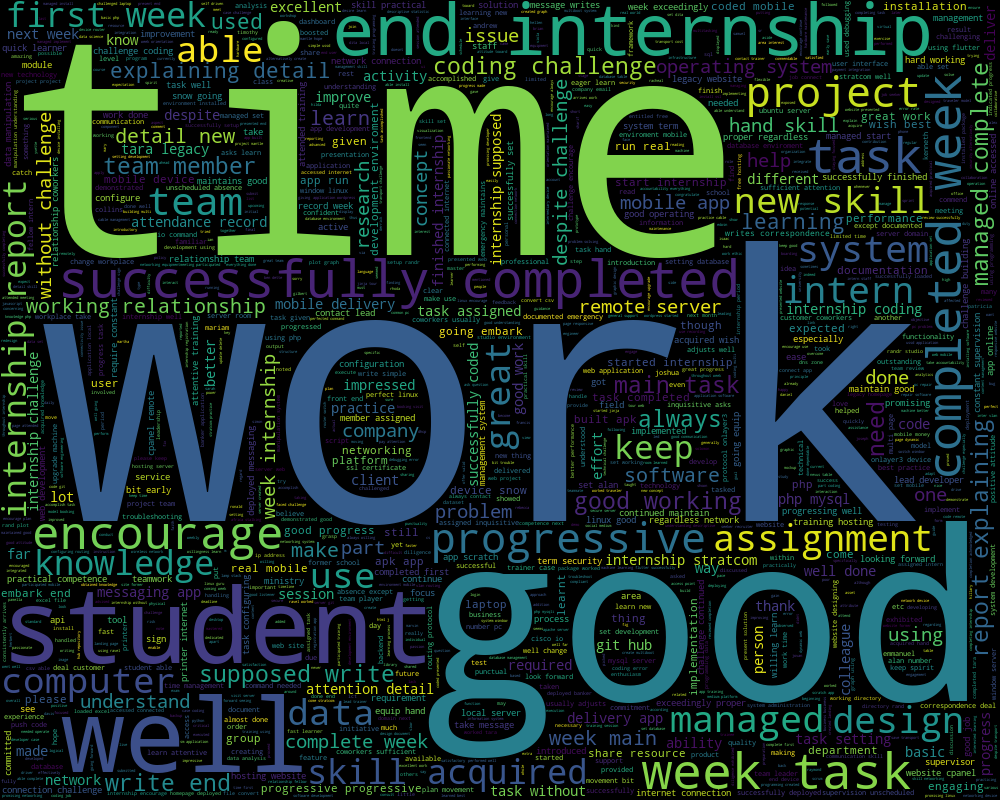

In [22]:
processed_string = ""
for x in internship_words_3:
    processed_string += " "+x
    
processed_string

# Create a WordCloud object of the processed words
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue',width=1000,height=800)

# Generate a word cloud
wordcloud.generate(processed_string)

# Visualize the word cloud
wordcloud.to_image()

In [23]:
# Save the processed file

processed_file = 'processed_file' + '.txt'
file_path = open(path + '/' + processed_file, 'w')

#write the processed string to file
file_path.write(processed_string)
 
#close file
file_path.close()

 <strong>Step 7: Part of Speech (PoS) tagging</strong>

In [24]:
internship_words_2# Part of Speech (PoS) tagging
tagged_tokens = nltk.pos_tag(internship_words_3, tagset='universal')
tagged_tokens

[('faith', 'NOUN'),
 ('exhibited', 'VERB'),
 ('enthusiasm', 'NOUN'),
 ('taking', 'VERB'),
 ('project', 'ADJ'),
 ('hand', 'NOUN'),
 ('already', 'ADV'),
 ('shown', 'VERB'),
 ('promising', 'ADJ'),
 ('sign', 'NOUN'),
 ('understanding', 'VERB'),
 ('core', 'NOUN'),
 ('concept', 'NOUN'),
 ('software', 'NOUN'),
 ('engineering', 'NOUN'),
 ('look', 'NOUN'),
 ('forward', 'ADV'),
 ('discovering', 'VERB'),
 ('time', 'NOUN'),
 ('go', 'VERB'),
 ('understood', 'ADJ'),
 ('structure', 'NOUN'),
 ('grail', 'NOUN'),
 ('different', 'ADJ'),
 ('component', 'NOUN'),
 ('relate', 'NOUN'),
 ('understands', 'NOUN'),
 ('process', 'NOUN'),
 ('getting', 'VERB'),
 ('apis', 'ADJ'),
 ('mtn', 'NOUN'),
 ('intern', 'NOUN'),
 ('oriented', 'VERB'),
 ('ict', 'ADJ'),
 ('setup', 'NOUN'),
 ('infrastructure', 'NOUN'),
 ('soroti', 'NOUN'),
 ('university', 'NOUN'),
 ('drafted', 'VERB'),
 ('work', 'NOUN'),
 ('plan', 'NOUN'),
 ('started', 'VERB'),
 ('internship', 'ADJ'),
 ('simon', 'NOUN'),
 ('encouraged', 'VERB'),
 ('take', 'VERB'),

 <strong>Step 7: Named entity recognition</strong>

In [ ]:
from nltk import ne_chunk
chunk = ne_chunk(tagged_tokens)
chunk

 <strong>Step 8: Clustering algorithm</strong>